## Introduction to NumPyro: Probabilistic Programming

Probabilistic programming is a powerful approach to modeling and inference in machine learning and statistics. It allows us to build models that incorporate uncertainty and make probabilistic predictions. NumPyro is a probabilistic programming library that combines the flexibility of NumPy with the probabilistic modeling capabilities of Pyro, making it an excellent choice for researchers and data scientists. In this introductory tutorial, we'll explore the basics of NumPyro and how to get started with probabilistic programming.

## Prerequisites

In [1]:
# uncomment this line on Colab
# !pip install numpyro

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS
import jax
import jax.numpy as jnp

import arviz as az

/opt/anaconda3/envs/aims/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Getting Started

Now that you have the required packages installed, let's start with a simple example of a probabilistic model in NumPyro.

In this code:

- We define a simple probabilistic model with two parameters: mean and scale.
- We specify priors for these parameters.
- The likelihood of the data is assumed to be normally distributed with the specified mean and scale.
- In this example, the likelihood is specified within the `numpyro.sample` statement inside the model function. NumPyro automatically evaluates the likelihood for the observed data points `(obs=data)` when performing MCMC inference.
- We use the No-U-Turn Sampler (NUTS) to perform Markov Chain Monte Carlo (MCMC) inference.
- Finally, we visualize the posterior distributions of the parameters.


I0000 00:00:1706348979.773744       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


  0%|                                                                                              | 0/2000 [00:00<?, ?it/s]

warmup:   0%|                                    | 1/2000 [00:01<48:32,  1.46s/it, 1 steps of size 2.34e+00. acc. prob=0.00]

warmup:  17%|█████▋                           | 347/2000 [00:01<00:05, 309.56it/s, 3 steps of size 9.42e-01. acc. prob=0.79]

warmup:  34%|███████████▎                     | 689/2000 [00:01<00:01, 661.28it/s, 7 steps of size 6.18e-01. acc. prob=0.79]

sample:  54%|████████████████▌              | 1072/2000 [00:01<00:00, 1101.83it/s, 3 steps of size 6.52e-01. acc. prob=0.93]

sample:  74%|██████████████████████▉        | 1479/2000 [00:01<00:00, 1593.36it/s, 3 steps of size 6.52e-01. acc. prob=0.92]

sample:  94%|█████████████████████████████▏ | 1880/2000 [00:01<00:00, 2055.74it/s, 3 steps of size 6.52e-01. acc. prob=0.92]

sample: 100%|███████████████████████████████| 2000/2000 [00:01<00:00, 1005.04it/s, 3 steps of size 6.52e-01. acc. prob=0.92]


                mean       std    median      5.0%     95.0%     n_eff     r_hat
      mean      1.17      0.67      1.21      0.03      2.21    465.31      1.00
     scale      1.85      0.62      1.75      0.87      2.63    490.01      1.00

Number of divergences: 0


array([[<AxesSubplot:title={'center':'mean'}>,
        <AxesSubplot:title={'center':'mean'}>],
       [<AxesSubplot:title={'center':'scale'}>,
        <AxesSubplot:title={'center':'scale'}>]], dtype=object)

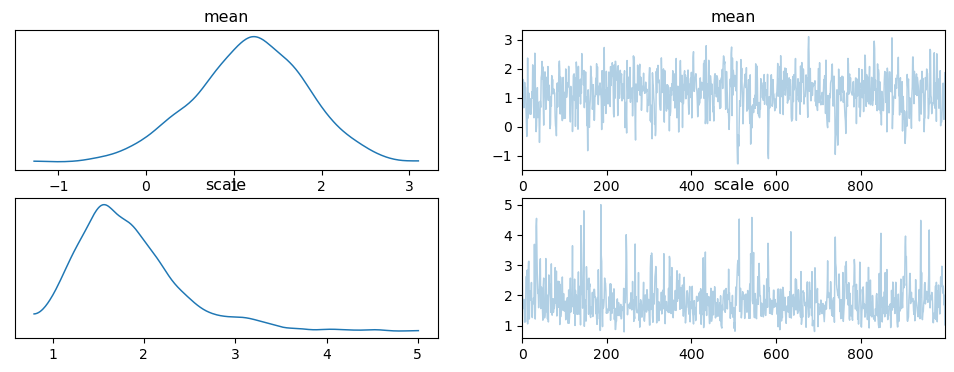

In [3]:


# Define a simple probabilistic model
def model(data):
    # Define priors
    mean = numpyro.sample("mean", dist.Normal(0, 1))
    scale = numpyro.sample("scale", dist.Exponential(1))

    # Likelihood
    with numpyro.plate("data_plate", len(data)):
        numpyro.sample("obs", dist.Normal(mean, scale), obs=data)

# Simulated data
data = jnp.array([2.3, 3.9, 1.7, -0.8, 2.5])

# Initialize the NUTS sampler
nuts_kernel = NUTS(model)

# Perform Markov Chain Monte Carlo (MCMC) inference
mcmc = MCMC(nuts_kernel, num_samples=1000, num_warmup=1000)
mcmc.run(jax.random.PRNGKey(0), data)

# Get the posterior samples
posterior_samples = mcmc.get_samples()

# Print summary statistics of posterior
mcmc.print_summary()

# Plot posterior distributions
az.plot_trace(mcmc)


## Conclusion

NumPyro is a versatile library for probabilistic programming that combines the power of NumPy and Pyro. In this introductory tutorial, we've covered the basics of defining a probabilistic model, performing MCMC inference, and visualizing the results. As you delve deeper into probabilistic programming with NumPyro, you'll be able to build more complex and customized models for your specific applications. Happy modeling!

## Numpyro distributions

The statement `import numpyro.distributions` as dist is used to import the `distributions` module from the NumPyro library and give it an alias or nickname `dist`. This alias makes it easier to access and use the various probability distributions provided by NumPyro throughout your code.


In probabilistic programming, you often need to specify probability distributions for the prior and likelihood in your models. NumPyro provides a variety of probability distributions that you can use, such as normal distributions, exponential distributions, categorical distributions, and many others. These distributions are organized within the `distributions` module.


By using the `import numpyro.distributions as dist` statement, you create a shorthand reference to the `distributions` module, so instead of typing `numpyro.distributions` every time you want to use a distribution, you can simply use `dist`. This simplifies your code and makes it more concise and readable.


For example, if you want to create a normal distribution in your code, you can now use `dist.Normal(...)` instead of `numpyro.distributions.Normal(...)`, thanks to the `dist` alias. It's a common practice in NumPyro code to use this alias to improve code clarity and reduce typing effort when working with probability distributions.


These examples below demonstrate how to create various probability distributions using the `dist` alias and sample from them. You can then use these distributions as components of your probabilistic models when defining priors or likelihoods in a Bayesian context or when generating random data for simulation and analysis.

### Normal distribution

-0.20584226


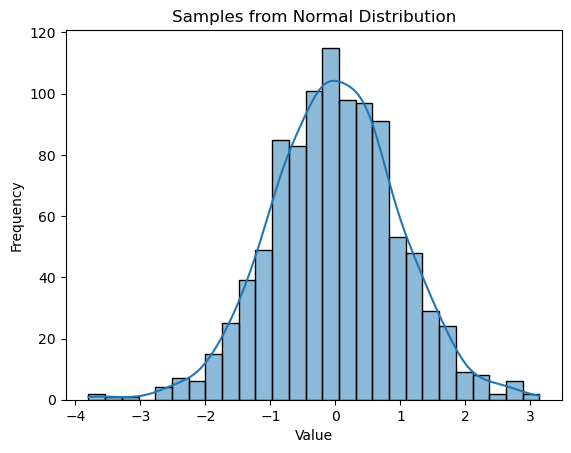

In [4]:
# Normal distribution

# Create a normal distribution with mean=0 and standard deviation=1
normal_dist = dist.Normal(0, 1)

# Sample from the normal distribution, once
sample = normal_dist.sample(jax.random.PRNGKey(0))

print(sample)

# Sample from the normal distribution, many times
samples = normal_dist.sample(jax.random.PRNGKey(0), (1000,))

# Plot a histogram of the samples
sns.histplot(samples, kde=True)
plt.title("Samples from Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


### Exponential distribution

0.2710352


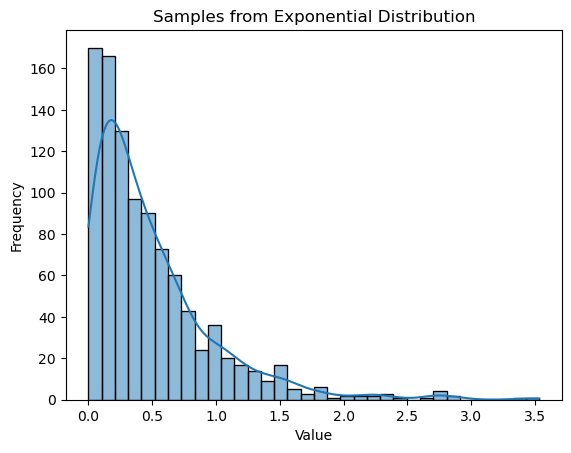

In [5]:
# exponential distribution

# Create an exponential distribution with rate parameter 2.0
exponential_dist = dist.Exponential(2.0)

# Sample from the exponential distribution, once
sample = exponential_dist.sample(jax.random.PRNGKey(0))

print(sample)

# Sample from the exponential distribution, many
samples = exponential_dist.sample(jax.random.PRNGKey(0), (1000,))

# Plot a histogram of the samples
sns.histplot(samples, kde=True)
plt.title("Samples from Exponential Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


### Categorical

1


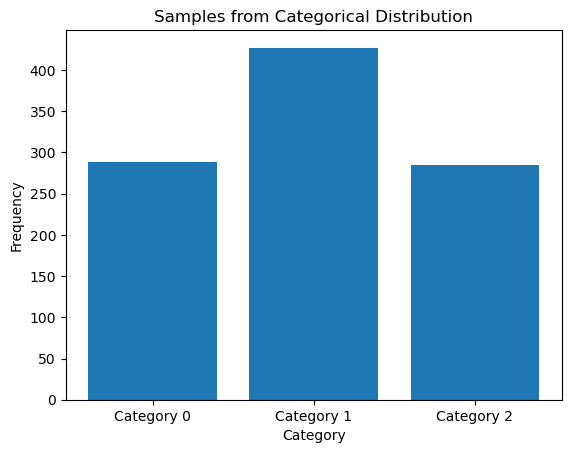

In [6]:
# categorical

# Define probabilities for three categories
probabilities = jnp.array([0.3, 0.4, 0.3])

# Create a categorical distribution
categorical_dist = dist.Categorical(probabilities)

# Sample from the categorical distribution, once
sample = categorical_dist.sample(jax.random.PRNGKey(0))

print(sample)

# Sample from the categorical distribution, many
samples = categorical_dist.sample(jax.random.PRNGKey(0), (1000,))

# Plot a bar chart of the samples
plt.hist(samples, bins=[0, 1, 2, 3], align='left', rwidth=0.8)
plt.xticks([0, 1, 2], labels=["Category 0", "Category 1", "Category 2"])
plt.title("Samples from Categorical Distribution")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()


### Beta

0.41446027


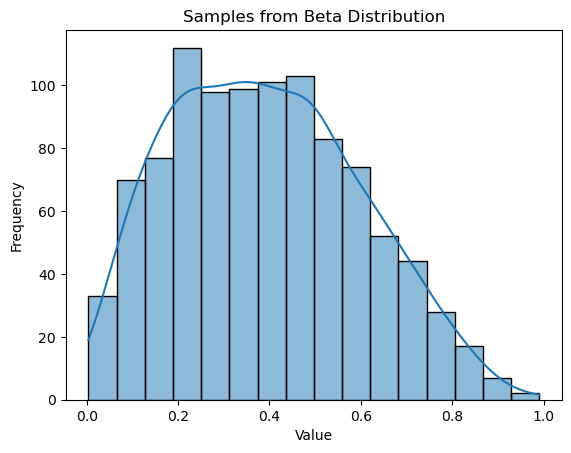

In [7]:
# beta

# Create a beta distribution with alpha=2 and beta=3
beta_dist = dist.Beta(2, 3)

# Sample from the beta distribution
sample = beta_dist.sample(jax.random.PRNGKey(0))
print(sample)

# Sample from the beta distribution, many
samples = beta_dist.sample(jax.random.PRNGKey(0), (1000,))

# Plot a histogram of the samples
sns.histplot(samples, kde=True)
plt.title("Samples from Beta Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


### Multivariate Normal

Mean `mu` and covariance `K`.

```{margin}
We will use this distribution a lot when dealing with spatial data.
```

[-0.78476596  1.740587  ]


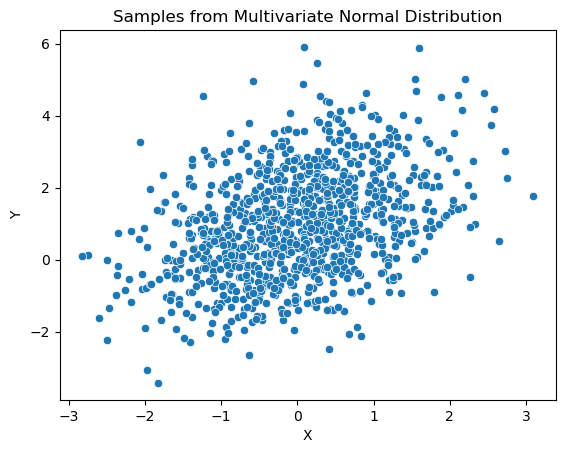

In [8]:
# MVN

# Create a multivariate normal distribution with mean vector and covariance matrix
mean = jnp.array([0.0, 1.0])
cov_matrix = jnp.array([[1.0, 0.5], [0.5, 2.0]])
multivariate_normal_dist = dist.MultivariateNormal(mean, cov_matrix)

# Sample from the multivariate normal distribution
sample = multivariate_normal_dist.sample(jax.random.PRNGKey(0))
print(sample)

# Sample from the multivariate normal distribution, many
samples = multivariate_normal_dist.sample(jax.random.PRNGKey(0), (1000,))

# Plot a scatter plot of the samples
sns.scatterplot(x=samples[:, 0], y=samples[:, 1])
plt.title("Samples from Multivariate Normal Distribution")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In a NumPyro program, you define a probabilistic model that consists of various elements. Let's break down the key elements of a typical NumPyro program:

1. Importing Libraries:

At the beginning of your NumPyro program, you import the necessary libraries, including NumPyro and other required dependencies like JAX and Pyro if applicable. For example:

In [9]:
import numpyro
import numpyro.distributions as dist
import jax
import jax.numpy as jnp


2. Defining the Model Function:

In NumPyro, you define your probabilistic model as a Python function. This function encapsulates the entire model, including both the prior distributions and the likelihood. Typically, the model function takes one or more arguments, such as data or model parameters, and returns a set of latent variables and observations.

In [10]:
def model(data):
    # Define prior distributions for model parameters
    mean = numpyro.sample("mean", dist.Normal(0, 1))
    scale = numpyro.sample("scale", dist.Exponential(1))

    # Define likelihood
    with numpyro.plate("data_plate", len(data)):
        numpyro.sample("obs", dist.Normal(mean, scale), obs=data)


3. Prior Distributions:

- Inside the model function, you define prior distributions for the model parameters. These prior distributions represent your beliefs about the parameters before observing any data. You use the `numpyro.sample` function to specify these priors. In the example above, `mean` and `scale` are defined as random variables sampled from specific prior distributions.


4. Likelihood:

- After specifying the prior distributions, you define the likelihood of your observed data. The likelihood represents the probability distribution of your observed data given the model parameters. It describes how likely it is to observe the data under different parameter values. In the example, the numpyro.sample function is used to define the likelihood of the data points given the mean and scale parameters.

5. Plate for Repetition:
- In Bayesian modeling, you often work with multiple data points that share the same statistical structure. The `numpyro.plate` context manager allows you to create a plate, which represents a repeated structure for data. It's used to efficiently handle repeated observations. In the example, `numpyro.plate` is used to specify that the likelihood applies to multiple data points.

6. Inference Algorithm:

- After defining your model, you need to choose an inference algorithm to estimate the posterior distribution of model parameters. NumPyro supports various inference algorithms, including NUTS (No-U-Turn Sampler) and SVI (Stochastic Variational Inference). You initialize and configure the chosen inference algorithm according to your requirements.


In [11]:
nuts_kernel = NUTS(model)


8. Performing Inference:

- You use the configured inference algorithm to perform Bayesian inference. In the example, MCMC (Markov Chain Monte Carlo) inference is performed using the `MCMC` class. The `run` method of the `MCMC` object is called to run the inference process.

In [12]:
mcmc = MCMC(nuts_kernel, num_samples=1000, num_warmup=1000)
mcmc.run(jax.random.PRNGKey(0), data)


  0%|                                                                                              | 0/2000 [00:00<?, ?it/s]

warmup:   0%|                                    | 1/2000 [00:01<47:12,  1.42s/it, 1 steps of size 2.34e+00. acc. prob=0.00]

warmup:  20%|██████▍                          | 390/2000 [00:01<00:04, 356.88it/s, 7 steps of size 4.84e-01. acc. prob=0.79]

warmup:  39%|████████████▉                    | 781/2000 [00:01<00:01, 767.80it/s, 1 steps of size 9.07e-01. acc. prob=0.79]

sample:  59%|██████████████████▏            | 1173/2000 [00:01<00:00, 1214.69it/s, 7 steps of size 6.52e-01. acc. prob=0.92]

sample:  78%|████████████████████████▎      | 1566/2000 [00:01<00:00, 1671.71it/s, 3 steps of size 6.52e-01. acc. prob=0.92]

sample:  98%|██████████████████████████████▍| 1962/2000 [00:01<00:00, 2114.88it/s, 3 steps of size 6.52e-01. acc. prob=0.92]

sample: 100%|███████████████████████████████| 2000/2000 [00:01<00:00, 1035.84it/s, 3 steps of size 6.52e-01. acc. prob=0.92]

9. Posterior Analysis:

- After running the inference, you can retrieve posterior samples of the model parameters. These samples represent the estimated posterior distribution of the parameters given the observed data. You can then analyze these samples to make inferences about your model.

In [13]:
posterior_samples = mcmc.get_samples()


10. Visualization and Inference:

- Finally, you can perform various tasks such as visualizing the posterior distributions, computing summary statistics, and making predictions or inferences based on the posterior samples.

These elements together form a typical NumPyro program for Bayesian probabilistic modeling. The key steps involve defining the model, specifying prior distributions and likelihood, selecting an inference algorithm, running the inference, and analyzing the posterior samples to draw conclusions about the model parameters.